<p>Statistical learning refers to a collection
of mathematical and computation tools to understand data.
In what is often called supervised learning,
the goal is to estimate or predict an output based on one or more inputs.
The inputs have many names, like predictors, independent variables,
features, and variables being called common.
The output or outputs are often called response variables,
or dependent variables.
If the response is quantitative-- say, a number that measures weight or height,
we call these problems regression problems.
If the response is qualitative-- say, yes or no, or blue or green,
we call these problems classification problems.
This case study deals with one specific approach to classification. <br>
The goal is to set up a classifier such that when
it's presented with a new observation whose category is not known,
it will attempt to assign that observation to a category, or a class,
based on the observations for which it does know the true category.
This specific method is known as the k-Nearest Neighbors classifier,
or kNN for short. <br>
Given a positive integer k, say 5, and a new data point,
it first identifies those k points in the data that are nearest to the point
and classifies the new data point as belonging to the most common class
among those k neighbors.</p>

In [12]:
import numpy as np

# Euclidean distance between two points expressed as NumPy arrays
point1 = np.array([1,1])
point2 = np.array([5,5])

np.sqrt(np.sum(np.power(point2 - point1, 2)))

5.656854249492381

In [13]:
def distance(p1, p2):
    '''
    input : np.array(), np.array
    Finds the distance between points p1 and p2.
    Returns distance.
    '''
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

In [25]:
from collections import Counter

votes = [1,2,3,1,2,5]
# Majority Vote
def majority_vote_1(votes):
    return Counter(votes)
r = majority_vote(votes)
max(r, key=r.get)

1

In [32]:
import scipy.stats as sp

def majority_vote_2(votes):
    mode, count = sp.mstats.mode(votes)
    return mode, count
majority_vote_2(votes)

(array([1.]), array([2.]))

In [70]:
import random

# Will use this method as it can handle multiple max votes and return a random result
def majority_vote(votes):
    votecounter = Counter(votes)
    maxvote = max(votecounter.values())
    winners = [vote for vote, count in votecounter.items() if count == maxvote]
    return random.choice(winners)
print(majority_vote(votes))
print(majority_vote(votes))

2
1


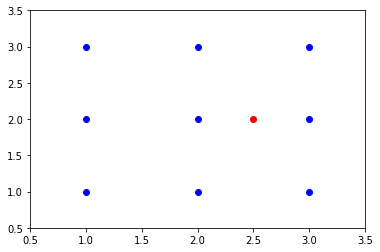

In [89]:
import matplotlib.pyplot as plt

points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])

plt.plot(points[:,0], points[:,1], "bo")
plt.plot(p[0], p[1], "ro")
plt.axis([.5, 3.5, .5 ,3.5])
plt.show()

In [118]:
# calculate the distance between a point p and each of the points in array points.
distances = np.array([distance(p, points[i]) for i in range(points.shape[0])])
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [113]:
# Perform an indirect sort along the given axis using the algorithm specified by the kind keyword.
# It returns an array of indices of the same shape as a that index data along the given axis in sorted order.
ind = np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [115]:
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [117]:
# selecting the neareast k neareast element [0:k]
distances[ind[0:2]]

array([0.5, 0.5])

In [123]:
def find_nearest_neighbours(p, points, k=5):
    '''
    Find the k nearest neighbors of point p and return their indices. 
    '''
    distances = np.array([distance(p, points[i]) for i in range(points.shape[0])])
    ind = np.argsort(distances)
    return ind[:k]
points[find_nearest_neighbours(p, points, 2)]

array([[2, 2],
       [3, 2]])

In [131]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbours(p, points, k)
    return majority_vote(outcomes[ind])

# class 0,1
outcomes = np.array([0,0,0,0,1,1,1,1,1])
knn_predict(np.array([2.5,2.7]), points, outcomes, 2)

1

In [137]:
knn_predict(np.array([1.,2.7]), points, outcomes, 2)

0